# Prudential Life Insurance Assessment

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Get the Data

In [2]:
df1 = pd.read_csv('E:/AdvAnal/python_103/1_Data/df_train1.csv')
df2 = pd.read_csv('E:/AdvAnal/python_103/1_Data/df_train2.csv')
df3 = pd.read_csv('E:/AdvAnal/python_103/1_Data/df_train3.csv')
df4 = pd.read_csv('E:/AdvAnal/python_103/1_Data/df_train4.csv')
df5 = pd.read_csv('E:/AdvAnal/python_103/1_Data/df_train5.csv')
df6 = pd.read_csv('E:/AdvAnal/python_103/1_Data/df_train6.csv')
dft = pd.read_csv('E:/AdvAnal/python_103/1_Data/df_test.csv')

In [3]:
train = pd.concat([df1,df2,df3,df4,df6],axis=0)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49381 entries, 0 to 9380
Columns: 127 entries, y to WT_
dtypes: int64(127)
memory usage: 48.2 MB


In [4]:
test = df5
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 127 entries, y to WT_
dtypes: int64(127)
memory usage: 9.7 MB


In [5]:
df = pd.concat([df1,df2,df3,df4,df5,df6],axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59381 entries, 0 to 9380
Columns: 127 entries, y to WT_
dtypes: int64(127)
memory usage: 58.0 MB


In [6]:
sub = dft
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19765 entries, 0 to 19764
Columns: 127 entries, Id to WT_
dtypes: int64(127)
memory usage: 19.2 MB


# Clean the Data

In [7]:
cat_feats = ['BMI_', 'EI_1_', 'EI_2_', 'EI_3_', 'EI_4_', 'EI_5_', 'EI_6_', 'FH_1_', 'FH_2_', 'FH_3_', 'FH_4_', 'FH_5_', 
             'HT_', 'IAGE_', 'IH_1_', 'IH_2_', 'IH_3_', 'IH_4_', 'IH_5_', 'IH_7_', 'IH_8_', 'IH_9_', 
             'II_1_', 'II_2_', 'II_3_', 'II_4_', 'II_5_', 'II_6_', 'II_7_', 'MH_1_', 'MH_2_', 'MH_3_', 'MH_4_', 'MH_5_', 'MH_6_', 
             'MH_7_', 'MH_8_', 'MH_9_', 'MH_10_', 'MH_11_', 'MH_12_', 'MH_13_', 'MH_14_', 'MH_15_', 'MH_16_', 'MH_17_', 'MH_18_', 
             'MH_19_', 'MH_20_', 'MH_21_', 'MH_22_', 'MH_23_', 'MH_24_', 'MH_25_', 'MH_26_', 'MH_27_', 'MH_28_', 'MH_29_', 
             'MH_30_', 'MH_31_', 'MH_32_', 'MH_33_', 'MH_34_', 'MH_35_', 'MH_36_', 'MH_37_', 'MH_38_', 'MH_39_', 'MH_40_', 'MH_41_', 
             'MK_1_', 'MK_2_', 'MK_3_', 'MK_4_', 'MK_5_', 'MK_6_', 'MK_7_', 'MK_8_', 'MK_9_', 'MK_10_', 'MK_11_', 'MK_12_', 
             'MK_13_', 'MK_14_', 'MK_15_', 'MK_16_', 'MK_17_', 'MK_18_', 'MK_19_', 'MK_20_', 'MK_21_', 'MK_22_', 'MK_23_', 'MK_24_', 
             'MK_25_', 'MK_26_', 'MK_27_', 'MK_28_', 'MK_29_', 'MK_30_', 'MK_31_', 'MK_32_', 'MK_33_', 'MK_34_', 'MK_35_', 'MK_36_', 
             'MK_37_', 'MK_38_', 'MK_39_', 'MK_40_', 'MK_41_', 'MK_42_', 'MK_43_', 'MK_44_', 'MK_45_', 'MK_46_', 'MK_47_', 'MK_48_', 
             'PI_1_', 'PI_2_', 'PI_3_', 'PI_4_', 'PI_5_', 'PI_6_', 'PI_7_', 'WT_']

In [8]:
y_train = train['y'].copy()
x_train = train.drop('y', 1).copy()
x_train = pd.get_dummies(x_train,columns=cat_feats,drop_first=True).copy()

In [9]:
y_test = test['y'].copy()
x_test = test.drop('y', 1).copy()
x_test = pd.get_dummies(x_test,columns=cat_feats,drop_first=True).copy()

In [10]:
y_df = df['y'].copy()
x_df = df.drop('y', 1).copy()
x_df = pd.get_dummies(x_df,columns=cat_feats,drop_first=True).copy()

In [11]:
y_sub = sub['Id'].copy()
x_sub = sub.drop('Id', 1).copy()
x_sub = pd.get_dummies(x_sub,columns=cat_feats,drop_first=True).copy()

# Random Forest

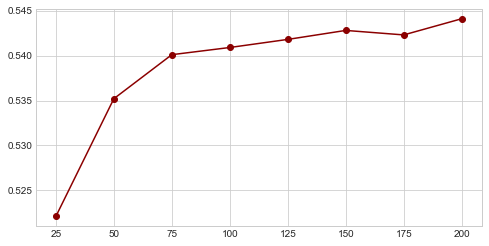

In [12]:
results = []
n_estimaor_options = [25,50,75,100,125,150,175,200]
for trees in n_estimaor_options:
    model = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimaor_options).plot(color="darkred",marker="o")

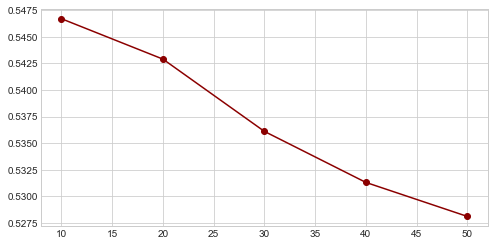

In [13]:
results = []
min_samples_leaf_options = [10,20,30,40,50]
for trees in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=125, oob_score=True, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf = trees)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, min_samples_leaf_options).plot(color="darkred",marker="o")

In [14]:
rfm = RandomForestClassifier(n_estimators=125, oob_score=True, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf = 10)
rfm.fit(x_train, y_train)
y_pred=rfm.predict(x_test)

In [15]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

df_table = confusion_matrix(test_calc['y'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[ 153  145   13   43   87  201  140  248]
 [ 100  276   11   26  127  210  132  207]
 [  13   16   48   56   16   18    3   10]
 [  12    2    4  173    0   11    2   37]
 [  20  111    0    0  352  205   59  164]
 [  59   84    1    2  113  920  283  448]
 [  22   13    0    0   16  231  580  512]
 [   5   15    0    0    6  130  145 2964]]
accuracy: 0.63649851632
precision: 0.655581947743
recall: 0.734042553191
f1 score:  0.692597239649


# Output

In [16]:
y_df=pd.DataFrame(rfm.predict(x_df))
y_df.rename(columns={0: '35_df'}, inplace=True)
y_df.to_csv('35_df.csv')

In [17]:
Response=pd.DataFrame(rfm.predict(x_sub))
sub = pd.concat([y_sub,Response],axis=1)
sub.rename(columns={0: 'Response'}, inplace=True)
sub.to_csv('35_sub.csv',index = False)